In [2]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/tmdb_5000_movies.csv")

In [3]:
credits_df = pd.read_csv("../data/tmdb_5000_credits.csv")
credits_df.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
def extract_director(crew_json):
    try:
        crew_list = ast.literal_eval(crew_json)
        for person in crew_list:
            if person.get("job") == "Director":
                return person.get("name")
    except:
        return None

# Yeni sütun olarak ekle
credits_df["director"] = credits_df["crew"].apply(extract_director)
credits_df = credits_df[["movie_id", "director"]]
credits_df.head()

,movie_id,director
0,19995,James Cameron
1,285,Gore Verbinski
2,206647,Sam Mendes
3,49026,Christopher Nolan
4,49529,Andrew Stanton


In [5]:
df = df.merge(credits_df, left_on="id", right_on="movie_id")

In [6]:
# En az 3 filmi olan yönetmenler
director_avg = df.groupby("director").filter(lambda x: len(x) >= 3)

# Ortalama puanları hesapla
director_ratings = director_avg.groupby("director")["vote_average"].mean().sort_values(ascending=False)
director_ratings.head(10)

director
Hayao Miyazaki       8.050000
Sergio Leone         8.000000
Christopher Nolan    7.800000
Quentin Tarantino    7.775000
Pete Docter          7.733333
Stanley Kubrick      7.683333
Denis Villeneuve     7.666667
Miloš Forman         7.633333
Frank Capra          7.620000
Billy Wilder         7.600000
Name: vote_average, dtype: float64

C:\Users\Ensar\AppData\Local\Temp\ipykernel_6816\3655851478.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=director_ratings.head(15).values, y=director_ratings.head(15).index, palette="crest")


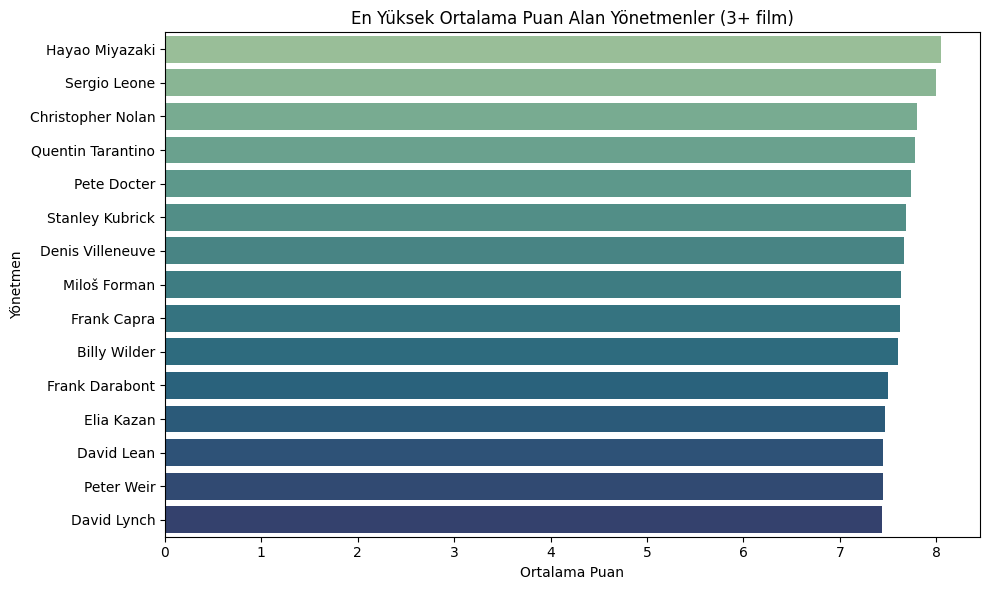

In [7]:
plt.figure(figsize=(10,6))
sns.barplot(x=director_ratings.head(15).values, y=director_ratings.head(15).index, palette="crest")
plt.xlabel("Ortalama Puan")
plt.ylabel("Yönetmen")
plt.title("En Yüksek Ortalama Puan Alan Yönetmenler (3+ film)")
plt.tight_layout()
plt.savefig("../visuals/top_directors_rating.png", dpi=300)
plt.show()

### 4. 🎬 Yönetmenlere Göre Ortalama Puan Analizi (3+ Film)
En az 3 filmi bulunan yönetmenler arasında ortalama puanı en yüksek olanlar öne çıkarılmıştır. Bu analiz, hem kalite hem de üretkenlik açısından dikkat çeken yönetmenleri belirlemede yardımcı olabilir.

### 4. 🎬 Average Ratings by Director (3+ Movies)
Among directors with at least 3 films, those with the highest average ratings were highlighted. This analysis helps identify directors who stand out in terms of both quality and productivity.